In [3]:
import pandas as pd
import numpy as np
from scipy import stats as sts
from matplotlib import pyplot as plt

In [3]:
happy_data = pd.read_csv('Resources/happiness-cantril-ladder.csv')
anxiety_data = pd.read_csv('Resources/number-with-anxiety-disorders.csv')
drinks_data = pd.read_csv('Resources/drinks_solution.csv')
wine_data = pd.read_csv('Resources/Wine Production By Country.csv', delimiter=';')


,year,state,name,chrstprot,chrstcat,chrstorth,chrstang,chrstothr,chrstgen,judorth,...,othrgenpct,sumreligpct,total,dualrelig,datatype,sourcereliab,recreliab,reliabilevel,Version,sourcecode
0,1945,2,USA,66069671,38716742,1121898,2400000,1956807,110265118,821489,...,0.0039,0.9961,1.0000,0,34,2,10,Medium,1.1,13
1,1950,2,USA,73090083,42635882,3045420,3045420,1177214,122994019,1078078,...,0.0041,0.9959,1.0000,0,34,6,28,Low,1.1,18
2,1955,2,USA,79294628,46402368,3454916,2572767,2277091,134001770,944000,...,0.0193,0.9807,0.9999,0,134,5,10,Medium,1.1,15
3,1960,2,USA,90692928,50587880,3334535,2710065,2908939,150234347,973500,...,0.0076,0.9924,0.9999,0,134,2,10,Medium,1.1,13
4,1965,2,USA,94165803,64761783,4792868,2822149,973155,167515758,991200,...,0.0030,0.9970,1.0001,0,134,8,28,Low,1.1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1990,990,WSM,98400,24600,0,420,36080,159500,0,...,0.0008,0.9992,1.0000,0,134,4,10,Medium,1.1,7
1991,1995,990,WSM,99000,26000,0,377,36300,161677,0,...,0.0007,0.9993,1.0001,0,134,5,20,Medium,1.1,1
1992,2000,990,WSM,138600,36000,0,0,0,174600,0,...,0.0157,0.9844,1.0000,0,24,5,10,Medium,1.1,83
1993,2005,990,WSM,140910,36600,0,0,0,177510,0,...,0.0159,0.9841,1.0000,0,24,5,10,Medium,1.1,83


In [73]:
drinks_data = drinks_data.rename(columns={'country':'Entity'})
combined_df = pd.merge(happy_data, anxiety_data, on=['Entity','Code'], how='outer')
combined_df = combined_df.dropna()
combined_df = combined_df.rename(columns={'Prevalence - Anxiety disorders - Sex: Male - Age: All Ages (Number)': 'num_males_with_anxiety'})
combined_df = combined_df.rename(columns={'Prevalence - Anxiety disorders - Sex: Female - Age: All Ages (Number)': 'num_females_with_anxiety'})
combined_df = combined_df.rename(columns={'Life satisfaction in Cantril Ladder (World Happiness Report 2019)': 'happy_score'})

combined_df.head()

,Entity,Code,Year_x,happy_score,Year_y,num_males_with_anxiety,num_females_with_anxiety
0,Afghanistan,AFG,2008.0,3.72359,1990.0,164475.899445,252379.267264
1,Afghanistan,AFG,2008.0,3.72359,1991.0,170087.377635,262036.445129
2,Afghanistan,AFG,2008.0,3.72359,1992.0,199894.632147,310572.487808
3,Afghanistan,AFG,2008.0,3.72359,1993.0,231159.684414,361936.608315
4,Afghanistan,AFG,2008.0,3.72359,1994.0,238886.225430,376216.938911


In [116]:
combined_df = combined_df[combined_df['Year_y'] > 2007]
male_anxiety_prev = combined_df['num_males_with_anxiety']
female_anxiety_prev = combined_df['num_females_with_anxiety']

combined_df.head()
# country_group = combined_df.groupby(['Entity'])
# df = country_group.mean()

# df.head()

,Entity,Code,Year_x,happy_score,Year_y,num_males_with_anxiety,num_females_with_anxiety
18,Afghanistan,AFG,2008.0,3.72359,2008.0,386270.282078,582400.266576
19,Afghanistan,AFG,2008.0,3.72359,2009.0,401638.384398,603707.850083
20,Afghanistan,AFG,2008.0,3.72359,2010.0,419893.836128,629540.743682
21,Afghanistan,AFG,2008.0,3.72359,2011.0,440847.831534,659739.339468
22,Afghanistan,AFG,2008.0,3.72359,2012.0,458964.821722,686651.273894


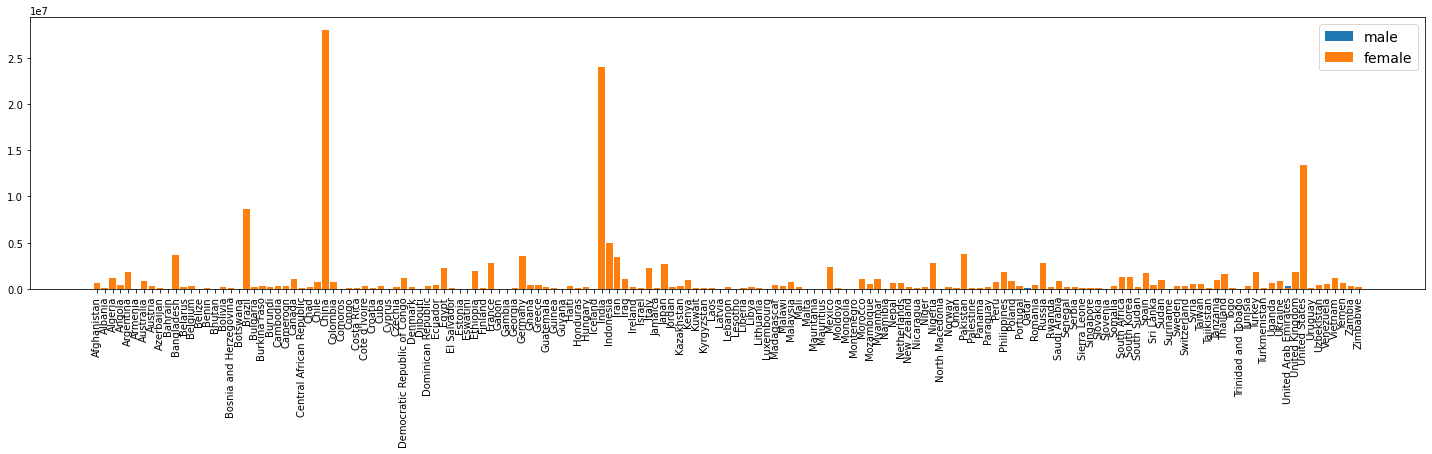

In [68]:
f, ax = plt.subplots(figsize=(25,5))
plt.bar(df.index, df['num_males_with_anxiety'], label='male')
plt.bar(df.index, df['num_females_with_anxiety'], label='female')
plt.xticks(rotation=90)
ax.legend(fontsize=14)
plt.show()

In [101]:
happy_data.head()
country_year_happy = happy_data.groupby(['Entity', 'Year'])
grouped_happy_data = country_year_happy.mean()
grouped_happy_data = happy_data.rename(columns={'Life satisfaction in Cantril Ladder (World Happiness Report 2019)': 'happy_rating'})
grouped_happy_data

happy_rating
Entity      Year              
Afghanistan 2008      3.723590
            2009      4.401778
            2010      4.758381
            2011      3.831719
            2012      3.782938
...                        ...
Zimbabwe    2014      4.184451
            2015      3.703191
            2016      3.735400
            2017      3.638300
            2018      3.616480

[1704 rows x 1 columns]

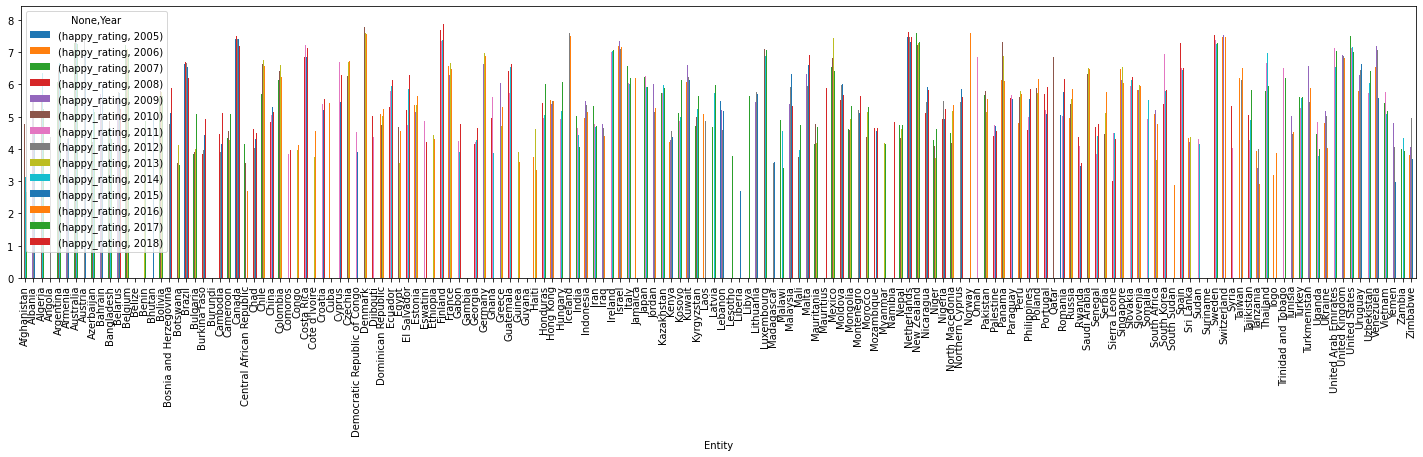

In [105]:
grouped_happy_data.unstack().plot(kind='bar', figsize=(25,5))

In [108]:
drinks_data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.3
4,Angola,217,57,45,5.7


In [130]:
country_happy = happy_data.groupby('Entity')
df = country_happy.mean()
df['country'] = df.index
df.index = np.arange(len(df))
df

,happy_rating,country
0,3.705495,Afghanistan
1,4.990211,Albania
2,5.481872,Algeria
3,4.420299,Angola
4,6.358951,Argentina
...,...,...
159,6.203183,Venezuela
160,5.293443,Vietnam
161,3.886234,Yemen
162,4.631722,Zambia


In [134]:
drinks_data
happy_servings_df = pd.merge(df, drinks_data, on='country', how='inner')
happy_servings_df

,happy_rating,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,3.705495,Afghanistan,0,0,0,0.0
1,4.990211,Albania,89,132,54,4.9
2,5.481872,Algeria,25,0,14,0.7
3,4.420299,Angola,217,57,45,5.7
4,6.358951,Argentina,193,25,221,7.8
...,...,...,...,...,...,...
145,6.203183,Venezuela,333,100,3,7.7
146,5.293443,Vietnam,111,2,1,2.0
147,3.886234,Yemen,6,0,0,0.1
148,4.631722,Zambia,32,19,4,1.0


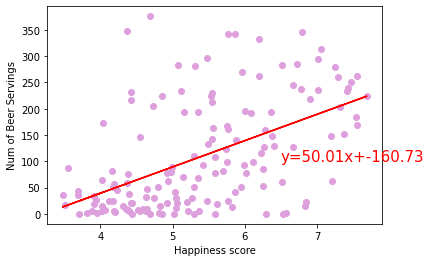

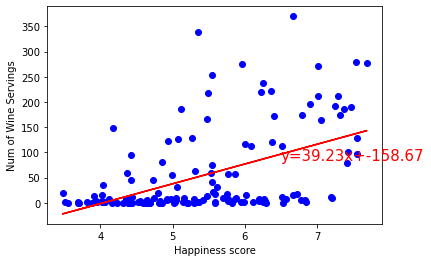

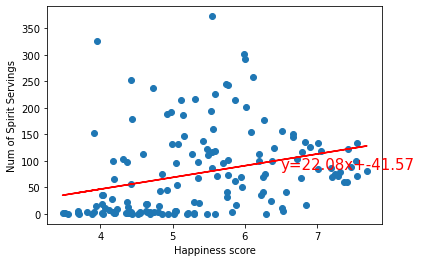

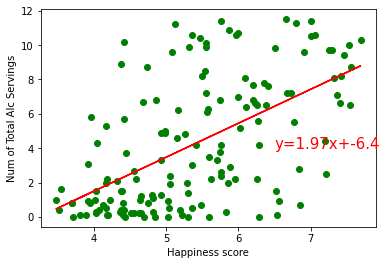

In [159]:
plt.scatter(happy_servings_df['happy_rating'], happy_servings_df['beer_servings'], c='plum')
x = happy_servings_df['happy_rating']
y = happy_servings_df['beer_servings']
slope, intercept, r_value, p_value, std_err = sts.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
reg_str = 'y='+ str(round(slope, 2)) +'x+' + str(round(intercept, 2))
plt.annotate(reg_str, (6.5,100), fontsize=15, color='red' )
plt.xlabel('Happiness score')
plt.ylabel('Num of Beer Servings')
plt.savefig('output/beer_to_happiness.png', dpi=400)
plt.show()

plt.scatter(happy_servings_df['happy_rating'], happy_servings_df['wine_servings'], c='blue')
y = happy_servings_df['wine_servings']
slope, intercept, r_value, p_value, std_err = sts.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
reg_str = 'y='+ str(round(slope, 2)) +'x+' + str(round(intercept, 2))
plt.annotate(reg_str, (6.5,85), fontsize=15, color='red' )
plt.xlabel('Happiness score')
plt.ylabel('Num of Wine Servings')
plt.savefig('output/wine_to_happiness.png', dpi=400)
plt.show()

plt.scatter(happy_servings_df['happy_rating'], happy_servings_df['spirit_servings'])
y = happy_servings_df['spirit_servings']
slope, intercept, r_value, p_value, std_err = sts.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
reg_str = 'y='+ str(round(slope, 2)) +'x+' + str(round(intercept, 2))
plt.annotate(reg_str, (6.5,85), fontsize=15, color='red' )
plt.xlabel('Happiness score')
plt.ylabel('Num of Spirit Servings')
plt.savefig('output/spirit_to_happiness.png', dpi=400)
plt.show()

plt.scatter(happy_servings_df['happy_rating'], happy_servings_df['total_litres_of_pure_alcohol'], c='green')
y = happy_servings_df['total_litres_of_pure_alcohol']
slope, intercept, r_value, p_value, std_err = sts.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
reg_str = 'y='+ str(round(slope, 2)) +'x+' + str(round(intercept, 2))
plt.annotate(reg_str, (6.5,4), fontsize=15, color='red')
plt.xlabel('Happiness score')
plt.ylabel('Num of Total Alc Servings')
plt.savefig('output/total_alc_to_happiness.png', dpi=400)
plt.show()

In [27]:
alc_expend_data = pd.read_csv('Resources/alcohol-expenditure-as-share-of-total.csv')
alc_expend_data = alc_expend_data.rename(columns={'Indicator:Alcohol expenditure as a per cent of total household expenditure': 'alc_purchase_percent_of_total_income'})
alc_expend_data

,Entity,Code,Year,alc_purchase_percent_of_total_income
0,Albania,ALB,2007,2.1
1,Albania,ALB,2012,5.1
2,Albania,ALB,2013,4.8
3,Albania,ALB,2014,4.5
4,Armenia,ARM,1990,4.0
...,...,...,...,...
472,Uzbekistan,UZB,1992,3.2
473,Uzbekistan,UZB,1993,2.9
474,Uzbekistan,UZB,1994,2.5
475,Uzbekistan,UZB,1995,1.9


In [28]:
countries = alc_expend_data['Code']

d = {ni: indi for indi, ni in enumerate(set(countries))}
numbers = [d[ni] for ni in countries]

years = alc_expend_data['Year']
spending = alc_expend_data['alc_purchase_percent_of_total_income']

In [29]:
place = alc_expend_data['Entity']

plot_color_legend = pd.DataFrame(set(zip(numbers, place)))

plot_color_legend

,0,1
0,42,Netherlands
1,48,Sweden
2,43,Italy
3,31,Georgia
4,47,Canada
5,16,Azerbaijan
6,23,Albania
7,35,Denmark
8,51,Russia
9,6,Kyrgyzstan


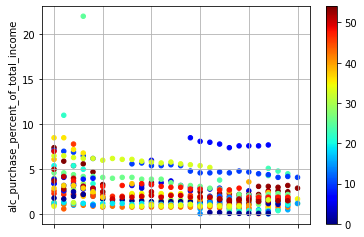

In [30]:
# no x label?
alc_expend_data.plot.scatter('Year', 'alc_purchase_percent_of_total_income', c=numbers, colormap='jet');
plt.grid(True)

In [10]:
# mega_df = pd.read_csv('../Alison/mega_df.csv')
mega_df_with_climate = pd.read_csv('../mega_df_with_climate.csv')
# mega_df.head()

In [9]:
 mega_df_with_climate.head()

,Unnamed: 0,Unnamed: 0.1,continent,country_code,country,consumption_per_capita_(L),climate,main_export,main_industry,region,happy_score,life_expectancy,gdp_per_capita,code,mental_health_and_addiction (%),Climate_Fixed
0,0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,AFG,17.553463,Arid
1,1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,ALB,10.987610,Temperate
2,2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,DZA,14.700388,Arid
3,3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,AND,14.726869,Temperate
4,4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,AGO,12.498281,Tropical


In [12]:
countries = mega_df_with_climate['country']


In [45]:
# # happy v. consumption by country

# consumption_happy = mega_df_with_climate[['consumption_per_capita_(L)', 'happy_score']]

# d = {ni: indi for indi, ni in enumerate(set(countries))}
# numbers = [d[ni] for ni in countries]

# consumption_happy.plot.scatter('consumption_per_capita_(L)', 'happy_score', c=numbers, colormap='jet');
# plt.grid(True)

# consumption_happy.head()

In [46]:
# plot_color_legend = pd.DataFrame(set(zip(numbers, countries)))

# plot_color_legend

In [47]:
# # Mental Health v. consumption by country

# consumption_mental = mega_df_with_climate[['consumption_per_capita_(L)', 'mental_health_and_addiction (%)']]
# consumption_mental.plot.scatter('consumption_per_capita_(L)', 'mental_health_and_addiction (%)', c=numbers, colormap='jet');
# plt.grid(True)

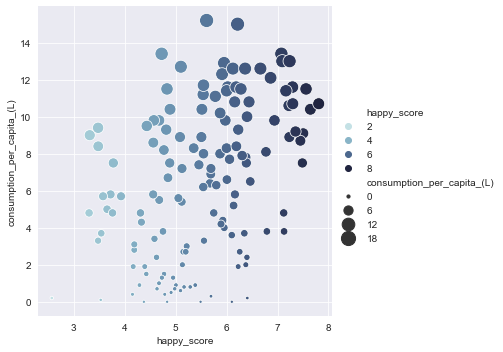

In [48]:
import seaborn as sns

sns.set_style(style="darkgrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=mega_df_with_climate,
    x="happy_score", y="consumption_per_capita_(L)",
    hue='happy_score', size="consumption_per_capita_(L)",
    palette=cmap, sizes=(10, 200),
)


# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);

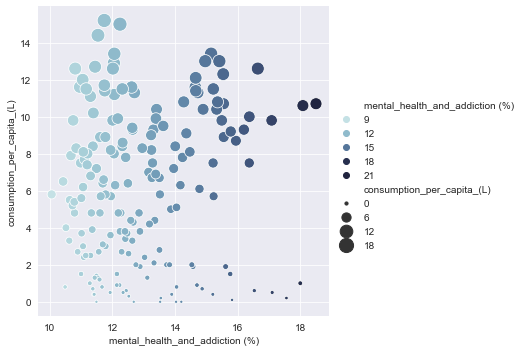

In [49]:
sns.set_style(style="darkgrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=mega_df_with_climate,
    x="mental_health_and_addiction (%)", y="consumption_per_capita_(L)",
    hue='mental_health_and_addiction (%)', size="consumption_per_capita_(L)",
    palette=cmap, sizes=(10, 200),
)
# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);

In [33]:
by_region = mega_df_with_climate.groupby('region')

In [37]:
# avg_region = by_region.mean()
# avg_region.head()